# Magnetic Field Heatmap Around a Finite Solenoid (Side View)

## Objective

To visualize and understand the magnetic field distribution generated by a finite solenoid using a 2D heatmap in the x–z plane (side view), with the center of the solenoid aligned at the origin.

---

## Scientific Background

For an **ideal infinitely long solenoid**, the magnetic field inside is uniform and given by:

$$
B = \mu_0 n I
$$

Where:
- $$\mu_0$$ is the permeability of free space,
- $$n$$ is the number of turns per unit length,
- $$I$$ is the current.

However, for a **finite solenoid**, the field becomes non-uniform and must be computed using the **Biot–Savart Law**. In this simulation, we approximate the solenoid as a series of **stacked circular current loops**, and the magnetic field at a point due to one such loop is:

$$
B(x, z; z_0) = \frac{\mu_0 I R^2}{2 \left[ (x^2 + (z - z_0)^2 + R^2) \right]^{3/2}}
$$

The total magnetic field is computed by **summing contributions** from each loop.

The simulation code and plot follows:
(the rectangle dotted outline is a reference for where the solenoid is) 

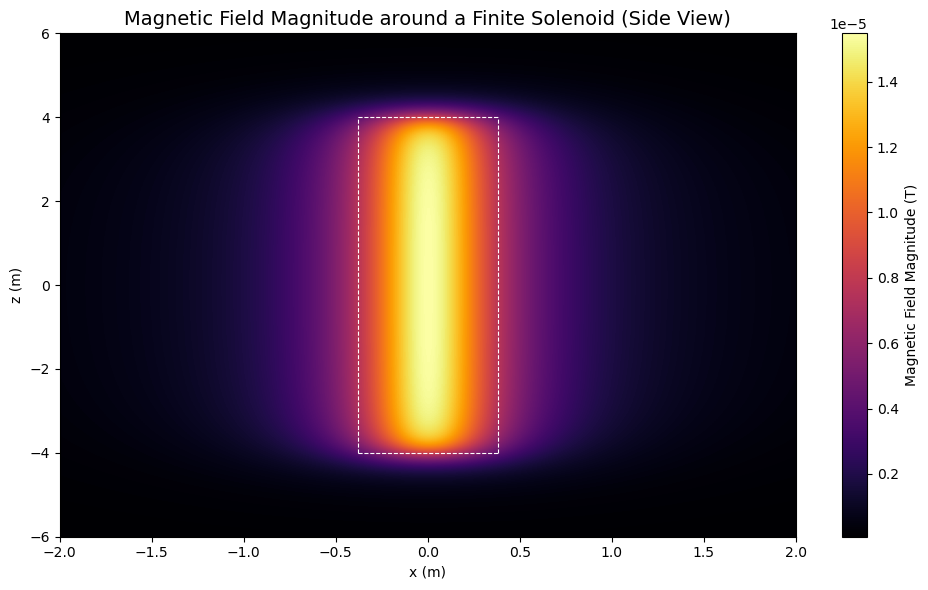

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Constants
mu_0 = 4 * np.pi * 1e-7  # vacuum permeability
I = 1.0                  # current in Amperes
N = 100                  # number of turns
R = 0.38                  # radius of solenoid (meters)
L = 8.0                  # total length of solenoid (meters)
n_turns = 100            # how many circular current loops to model

# Grid setup for x-z plane
x = np.linspace(-2, 2, 400)
z = np.linspace(-6, 6, 500)
X, Z = np.meshgrid(x, z)

# Function to calculate magnetic field magnitude at (x, z) due to a circular loop
def B_loop(x, z, z0, R, I):
    rho = np.sqrt(x**2 + (z - z0)**2)
    return mu_0 * I * R**2 / (2 * (R**2 + (z - z0)**2 + x**2)**(1.5))

# Summing field from multiple loops
B_total = np.zeros_like(X)

# Loop positions (z-axis, evenly spaced)
loop_positions = np.linspace(-L/2, L/2, n_turns)

for z0 in loop_positions:
    B_total += B_loop(X, Z, z0, R, I)

# Normalize field for plotting
norm = Normalize(vmin=np.min(B_total), vmax=np.max(B_total))

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Magnetic Field Magnitude around a Finite Solenoid (Side View)", fontsize=14)
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.imshow(B_total, extent=[x.min(), x.max(), z.min(), z.max()],
           origin='lower', cmap='inferno', norm=norm, aspect='auto')

# Add solenoid outline (just for visual reference)
plt.plot([-R, -R], [-L/2, L/2], 'w--', lw=0.8)
plt.plot([R, R], [-L/2, L/2], 'w--', lw=0.8)
plt.plot([-R, R], [-L/2, -L/2], 'w--', lw=0.8)
plt.plot([-R, R], [L/2, L/2], 'w--', lw=0.8)

cbar = plt.colorbar(label="Magnetic Field Magnitude (T)")
plt.grid(False)
plt.tight_layout()
plt.show()


## Interpretation of the Heatmap

- The **brightest region** in the center corresponds to the highest magnetic field — along the **axis of the solenoid**.
- The field **weakens radially and axially** away from the center.
- The field is mostly **confined within** the solenoid bounds, showing how well a solenoid channels the magnetic field.
- The **dashed white rectangle** outlines the solenoid body.

This matches expectations from electromagnetic theory: a finite solenoid shows strong, nearly uniform field in its center and rapidly decaying field outside.

---

## Accuracy & Limitations

- **Approximations used**:
  - Modeled as individual circular loops.
  - Field calculated via superposition.
- **Not accounted for**:
  - Mutual inductance between loops.
  - End effects at the quantum or microscopic scale.

This method is **physically correct** for qualitative and educational purposes. For high-precision simulations, numerical integration or software like COMSOL would be more appropriate.

---

## Conclusion

This visualization gives intuitive insight into the spatial distribution of the magnetic field around a finite solenoid. The use of heatmaps enables clear, immediate understanding of field strength and confinement — foundational for further studies in electromagnetism and computational physics.

